In [72]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import sklearn
from sklearn import linear_model, preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier, Lasso
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

import umap
from umap import UMAP
import os
import pickle
import random
import imblearn
# pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTENC
# pip install --upgrade tensorflow
import tensorflow as tf
# %pip install xgboost
import xgboost as xgb

# Data Cleaning

In [3]:
# setpath = '/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setA/training_original'
# savepath = '/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setA/training_original_noUnit/'

In [4]:
# subjectid = sorted(os.listdir(setpath))
# for sid in subjectid:
#     df1 = pd.read_csv(setpath + '/' + sid, sep = "|")
#     df1 = df1.drop(['Unit1', 'Unit2', 'HospAdmTime','ICULOS'], axis=1)
#     df1['SubjectID'] = [sid[0:7]] * len(df1)
#     df1.to_csv(savepath + sid, index = False)

In [5]:
# with open("/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setA/training_original_noUnit.psv", "wb") as fout:
#     for i, csv in enumerate(subjectid):
#         if i == 0:
#             with open(savepath + csv, "rb") as f:
#                 fout.write(f.read())
#       # now the rest:    
#         with open(savepath  + csv, "rb") as f:
#             next(f) 
#             fout.write(f.read())

In [6]:
A_original = pd.read_csv("/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setA/training_original_noUnit.psv",sep = ",")
A_original

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel,SubjectID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0,p000001
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0,p000001
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0,p000001
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0,p000001
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0,p000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790264,88.0,98.0,NaN,135.0,81.00,64.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,1,p020643
790265,96.0,98.0,38.72,174.0,97.00,72.0,16.0,NaN,2.0,NaN,...,27.8,NaN,NaN,NaN,NaN,NaN,62.29,1,1,p020643
790266,140.0,97.0,NaN,133.0,81.50,62.5,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,1,p020643
790267,120.0,96.0,NaN,154.0,118.00,105.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,1,p020643


In [7]:
# setpathB = '/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setB/testing_original'
# savepathB = '/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setB/testing_original_noUnit/'

# vars = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','EtCO2','BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2',
#  'AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate','Magnesium',
#  'Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets','Age',
#         'Gender']

In [8]:
# subjectidB = sorted(os.listdir(setpathB))
# for sid in subjectidB:
#     df2 = pd.read_csv(setpathB + '/' + sid, sep = "|")
#     df2 = df2.drop(['Unit1', 'Unit2', 'HospAdmTime','ICULOS'], axis=1)
#     df2['SubjectID'] = [sid[0:7]] * len(df2)
#     df2.to_csv(savepathB + sid, index = False)

In [9]:
# with open("/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setB/testing_original_noUnit.psv", "wb") as fout:
#     for i, csv in enumerate(subjectidB):
#         if i == 0:
#             with open(savepathB + csv, "rb") as f:
#                 fout.write(f.read())
#       # now the rest:    
#         with open(savepathB  + csv, "rb") as f:
#             next(f) 
#             fout.write(f.read())

In [10]:
B_original = pd.read_csv("/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setB/testing_original_noUnit.psv",sep = ",")
B_original

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel,SubjectID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73,1,0,p100001
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73,1,0,p100001
2,91.0,96.0,NaN,108.0,84.5,72.0,23.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73,1,0,p100001
3,93.0,98.0,NaN,123.0,87.0,61.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73,1,0,p100001
4,93.0,95.0,NaN,110.0,81.0,70.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73,1,0,p100001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762014,80.0,96.0,NaN,115.0,87.0,65.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62,0,0,p120000
762015,74.0,97.0,NaN,114.0,83.0,67.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62,0,0,p120000
762016,78.0,98.0,NaN,110.0,83.0,69.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62,0,0,p120000
762017,82.0,99.0,36.6,124.0,91.0,71.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62,0,0,p120000


In [11]:
# missing values in A
A_original.isna().sum()

HR                   61194
O2Sat                95089
Temp                523358
SBP                 120213
MAP                  80870
DBP                 380351
Resp                 77262
EtCO2               790269
BaseExcess          707881
HCO3                726650
FiO2                678110
pH                  699647
PaCO2               720975
SaO2                751105
AST                 778448
BUN                 725791
Alkalinephos        778736
Calcium             750949
Chloride            724490
Creatinine          737780
Bilirubin_direct    789087
Glucose             693611
Lactate             763126
Magnesium           728786
Phosphate           750371
Potassium           704431
Bilirubin_total     780575
TroponinI           789304
Hct                 697209
Hgb                 720446
PTT                 751963
WBC                 730919
Fibrinogen          784239
Platelets           738768
Age                      0
Gender                   0
SepsisLabel              0
S

In [13]:
# missing values in B
B_original.isna().sum()

HR                   92212
O2Sat               107659
Temp                503689
SBP                 106066
MAP                 112414
DBP                 106259
Resp                161079
EtCO2               704383
BaseExcess          760255
HCO3                760608
FiO2                744809
pH                  745061
PaCO2               745006
SaO2                747618
AST                 748656
BUN                 719926
Alkalinephos        748610
Calcium             710005
Chloride            757330
Creatinine          719889
Bilirubin_direct    760211
Glucose             593154
Lactate             747716
Magnesium           725547
Phosphate           739614
Potassium           703328
Bilirubin_total     748571
TroponinI           748203
Hct                 717643
Hgb                 717248
PTT                 754626
WBC                 721919
Fibrinogen          757807
Platelets           721308
Age                      0
Gender                   0
SepsisLabel              0
S

## Cleaning Training Dataset A and Testing Dataset B
First, We removed hospital-level variables `Unit1`, `Unit2`, `HospAdmTime`, and `ICULOS` since the information in these columns is not related to individual-level prediction. Another column of `ETCO2` was also dropped in both dataset A and dataset B because it only contains `NA` value.  

Then, we spent time in the imputation of missing values. We assumed that each patient has unique characteristic and every value has ongoing time specified. Thus, primarily, the `NAs` were imputed based on the last or next records of the missing values, meaning that if there is a value in previous or next time period, then impute with the previous or the next one. Otherwise, we replaced the mean for continuous variables and mode for categorical variables if the values are missing. 

Finally, considering the great benefit of early detection of Sepsis, we extracted the initial situation of patients, i.e. using the laboratory results and demographical features of the first time when patients visited hospitals. This gave us 20,336 records in training set and 20,000 data in test set. Notice that the final datasets are imbalanced: percentages of $0$ (do not develop sepsis) in the `SepsisLabel` in datasets A and B are around 91% and 94%, respectively. They will be balanced before modeling process using the SMOTE method later. 

In [14]:
## drop EtCO2 since all is missing
A_original = A_original.drop(columns = ['EtCO2'])
B_original = B_original.drop(columns = ['EtCO2'])

In [15]:
## dataset A
# setpath = '/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setA/training_original'
# subjectid = sorted(os.listdir(setpath))
# vars = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','EtCO2','BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2',
#  'AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate','Magnesium',
#  'Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets','Age','Gender']

In [16]:
## below can't be runned in the future, comment them but doesn't mean useless
#  for sid in subjectid:
#         df1 = pd.read_csv(setpath + '/' + sid, sep = "|")
#         df1 = df1.drop(['Unit1', 'Unit2', 'HospAdmTime','ICULOS'], axis=1)
#         if(len(df1[df1['SepsisLabel'] == 1]) > 0 ):
#             index_a = list(map(lambda i : i == 1, df1['SepsisLabel'])).index(True)
#             df2 = pd.DataFrame(df1.iloc[0:index_a + 1])
#             df = pd.DataFrame(df1.iloc[index_a ]).T
            
#             for vname in vars:
#                 if(df[vname].isna().sum() == 1):
#                     if(df2[vname].isna().sum() < len(df2[vname])):
#                         index_b = np.where(~np.isnan(df2[vname]))[0]
#                         index_b = index_b[-1]
#                         df[vname] = df[vname].replace(np.nan, df1[vname][index_b])
#                     else:
#                         if(df1[vname].isna().sum() < len(df1[vname])):
#                             index_b = np.where(~np.isnan(df1[vname]))[0]
#                             index_b = index_b[0]
#                             df[vname] = df[vname].replace(np.nan, df1[vname][index_b])
#         else:
#             df = pd.DataFrame(df1.iloc[0]).T
#             for vname in vars:
#                 if(df[vname].isna().sum() == 1 and (df1[vname].isna().sum() < len(df1[vname]))):
#                     index_b = np.where(~np.isnan(df1[vname]))[0]
#                     index_b = index_b[0]
#                     df[vname] = df[vname].replace(np.nan, df1[vname][index_b])

#         df['SubjectID'] = sid[0:7]
#         if(sid == subjectid[0]):
#             df.to_csv('/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setA/training_clean1.psv', mode='a', index=False, header=True)
#         else:
#             df.to_csv('/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setA/training_clean1.psv', mode='a', index=False, header=False)

In [6]:
df_preA = pd.read_csv("dataset/training_setA/training_clean1.psv",sep = ",")
df_preA.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel,SubjectID
0,97.0,95.0,36.11,98.0,75.33,NaN,19.0,NaN,24.0,45.0,...,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0.0,0.0,p000001
1,61.0,99.0,36.44,124.0,65.00,43.0,17.5,NaN,NaN,22.0,...,27.8,9.7,NaN,11.0,NaN,158.0,75.91,0.0,0.0,p000002
2,87.0,96.0,37.11,131.0,70.33,50.0,29.0,NaN,8.0,32.0,...,26.9,9.1,30.5,10.0,NaN,488.0,45.82,0.0,0.0,p000003
3,103.5,97.0,36.78,107.5,70.50,52.0,18.0,NaN,0.0,22.0,...,27.6,8.3,21.3,7.6,NaN,220.0,65.71,0.0,0.0,p000004
4,84.0,97.5,37.28,140.5,94.50,NaN,17.5,NaN,NaN,24.0,...,41.0,14.2,29.0,8.1,NaN,273.0,28.09,1.0,0.0,p000005


In [ ]:
## dataset B
# setpathB = '/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setB/testing_original'
# subjectidB = sorted(os.listdir(setpathB))

In [19]:
# for sid in subjectidB:
#         df1 = pd.read_csv(setpathB + '/' + sid, sep = "|")
#         df1 = df1.drop(['Unit1', 'Unit2', 'HospAdmTime','ICULOS'], axis=1)
#         if(len(df1[df1['SepsisLabel'] == 1]) > 0 ):
#             index_a = list(map(lambda i : i == 1, df1['SepsisLabel'])).index(True)
#             df2 = pd.DataFrame(df1.iloc[0:index_a + 1])
#             df = pd.DataFrame(df1.iloc[index_a ]).T
#             for vname in vars:
#                 if(df[vname].isna().sum() == 1):
#                     if(df2[vname].isna().sum() < len(df2[vname])):
#                         index_b = np.where(~np.isnan(df2[vname]))[0]
#                         index_b = index_b[-1]
#                         df[vname] = df[vname].replace(np.nan, df1[vname][index_b])
#                     else:
#                         if(df1[vname].isna().sum() < len(df1[vname])):
#                             index_b = np.where(~np.isnan(df1[vname]))[0]
#                             index_b = index_b[0]
#                             df[vname] = df[vname].replace(np.nan, df1[vname][index_b])
#         else:
#             df = pd.DataFrame(df1.iloc[0]).T
#             for vname in vars:
#                 if(df[vname].isna().sum() == 1 and (df1[vname].isna().sum() < len(df1[vname]))):
#                     index_b = np.where(~np.isnan(df1[vname]))[0]
#                     index_b = index_b[0]
#                     df[vname] = df[vname].replace(np.nan, df1[vname][index_b])

#         df['SubjectID'] = sid[0:7]
#         if(sid == subjectidB[0]):
#             df.to_csv('/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setB/testing_clean1.psv', mode='a', index=False, header=True)
#         else:
#             df.to_csv('/Users/xiaoy/OneDrive/Desktop/finalproj_STA663/training_setB/testing_clean1.psv', mode='a', index=False, header=False)

In [7]:
df_preB = pd.read_csv("dataset/training_setB/testing_clean1.psv",sep = ",")
df_preB.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel,SubjectID
0,93.0,92.5,36.5,110.0,76.0,56.0,22.0,NaN,NaN,NaN,...,35.3,11.3,NaN,10.8,NaN,170.0,73.0,1.0,0.0,p100001
1,56.5,100.0,35.2,129.0,75.0,52.5,23.0,35.0,NaN,NaN,...,31.4,11.1,NaN,13.2,NaN,85.0,83.0,1.0,0.0,p100002
2,130.0,96.0,36.6,129.0,87.0,72.0,24.0,NaN,NaN,NaN,...,32.3,10.8,NaN,15.5,NaN,337.0,48.0,1.0,0.0,p100003
3,65.0,100.0,36.7,140.0,84.0,65.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,67.0,1.0,0.0,p100004
4,55.0,100.0,36.1,131.0,68.0,50.5,24.0,NaN,NaN,NaN,...,24.7,8.0,32.3,10.6,NaN,421.0,50.0,1.0,0.0,p100005


#### imputing NA values

In [8]:
## drop EtCO2 since all is missing
df_preA = df_preA.drop(columns = ['EtCO2'])

In [10]:
## Impute rest of Missing Value with mean (continuous) and mode (categorical)
df_preA_noID = df_preA.drop(columns = ['SubjectID'])
miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
miss_mean_imputer = miss_mean_imputer.fit(df_preA_noID)
imputed_df_preA = miss_mean_imputer.transform(df_preA_noID)
imputed_df_preA = pd.DataFrame(data = imputed_df_preA, columns = df_preA_noID.columns)
df_finalA = pd.concat([df_preA['SubjectID'], imputed_df_preA], axis = 1)
df_finalA.head()

,SubjectID,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel
0,p000001,97.0,95.0,36.11,98.0,75.33,62.215276,19.0,24.000000,45.0,...,9.237423,37.2,12.5,37.300321,5.7,305.387222,317.0,83.14,0.0,0.0
1,p000002,61.0,99.0,36.44,124.0,65.00,43.000000,17.5,-0.462911,22.0,...,9.237423,27.8,9.7,37.300321,11.0,305.387222,158.0,75.91,0.0,0.0
2,p000003,87.0,96.0,37.11,131.0,70.33,50.000000,29.0,8.000000,32.0,...,9.237423,26.9,9.1,30.500000,10.0,305.387222,488.0,45.82,0.0,0.0
3,p000004,103.5,97.0,36.78,107.5,70.50,52.000000,18.0,0.000000,22.0,...,9.237423,27.6,8.3,21.300000,7.6,305.387222,220.0,65.71,0.0,0.0
4,p000005,84.0,97.5,37.28,140.5,94.50,62.215276,17.5,-0.462911,24.0,...,9.237423,41.0,14.2,29.000000,8.1,305.387222,273.0,28.09,1.0,0.0


In [11]:
## the percentage of label as 0 in training A
len(df_finalA[df_finalA['SepsisLabel'] == 0])/len(df_finalA)

0.911978756884343

In [12]:
## drop EtCO2 since all is missing
df_preB = df_preB.drop(columns = ['EtCO2'])
## Impute Missing Value with mean (continuous) and mode (categorical)
df_preB_noID = df_preB.drop(columns = ['SubjectID'])
miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
miss_mean_imputer = miss_mean_imputer.fit(df_preB_noID)
imputed_df_preB = miss_mean_imputer.transform(df_preB_noID)
imputed_df_preB = pd.DataFrame(data = imputed_df_preB, columns = df_preB_noID.columns)

In [13]:
df_finalB = pd.concat([df_preB['SubjectID'], imputed_df_preB], axis = 1)
df_finalB.head()

,SubjectID,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel
0,p100001,93.0,92.5,36.5,110.0,76.0,56.0,22.0,-1.895609,23.948197,...,5.059726,35.300000,11.300000,40.478854,10.800000,289.458162,170.00000,73.0,1.0,0.0
1,p100002,56.5,100.0,35.2,129.0,75.0,52.5,23.0,-1.895609,23.948197,...,3.700000,31.400000,11.100000,40.478854,13.200000,289.458162,85.00000,83.0,1.0,0.0
2,p100003,130.0,96.0,36.6,129.0,87.0,72.0,24.0,-1.895609,23.948197,...,0.720000,32.300000,10.800000,40.478854,15.500000,289.458162,337.00000,48.0,1.0,0.0
3,p100004,65.0,100.0,36.7,140.0,84.0,65.0,14.0,-1.895609,23.948197,...,5.059726,32.848838,10.789035,40.478854,10.431536,289.458162,204.82405,67.0,1.0,0.0
4,p100005,55.0,100.0,36.1,131.0,68.0,50.5,24.0,-1.895609,23.948197,...,0.030000,24.700000,8.000000,32.300000,10.600000,289.458162,421.00000,50.0,1.0,0.0


In [14]:
## the percentage of label as 0
len(df_finalB[df_finalB['SepsisLabel'] == 0])/len(df_finalB)

0.9429

# EDA 

#### Visualization: distribution plots for A
From the plots below, not all varaibles are normal distributed and the outliers are not obvious in the whole dataset. In this case, we could use normalization to rescale the data. 

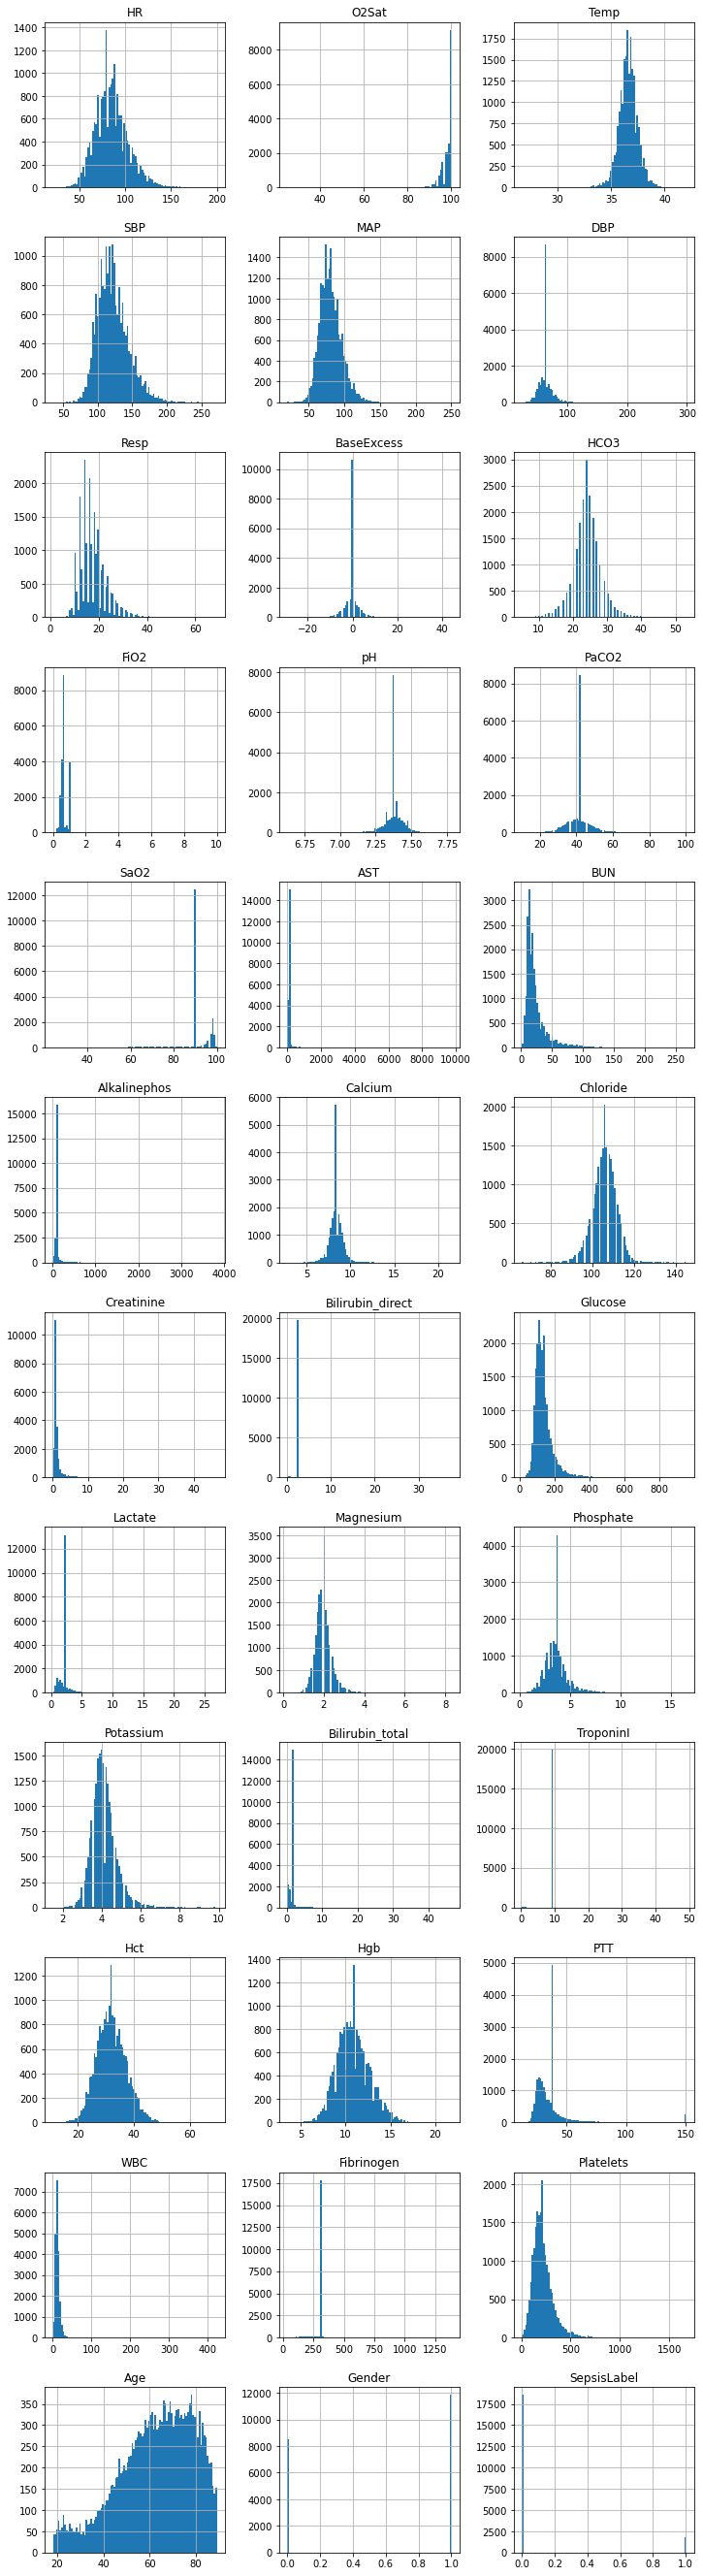

In [27]:
# plot all histrogram for all varaibles
fig, axes = plt.subplots(len(df_finalA.columns) // 3 , 3, figsize = (12,48))

i = 1
for triaxis in axes:
    for axis in triaxis:
        df_finalA.hist(column = df_finalA.columns[i], bins = 100, ax=axis)
        i = i+1

#### Visualization: correlation in A
Not high correlated among most of variables 

[Text(0.5, 0, 'HR'),
 Text(1.5, 0, 'O2Sat'),
 Text(2.5, 0, 'Temp'),
 Text(3.5, 0, 'SBP'),
 Text(4.5, 0, 'MAP'),
 Text(5.5, 0, 'DBP'),
 Text(6.5, 0, 'Resp'),
 Text(7.5, 0, 'BaseExcess'),
 Text(8.5, 0, 'HCO3'),
 Text(9.5, 0, 'FiO2'),
 Text(10.5, 0, 'pH'),
 Text(11.5, 0, 'PaCO2'),
 Text(12.5, 0, 'SaO2'),
 Text(13.5, 0, 'AST'),
 Text(14.5, 0, 'BUN'),
 Text(15.5, 0, 'Alkalinephos'),
 Text(16.5, 0, 'Calcium'),
 Text(17.5, 0, 'Chloride'),
 Text(18.5, 0, 'Creatinine'),
 Text(19.5, 0, 'Bilirubin_direct'),
 Text(20.5, 0, 'Glucose'),
 Text(21.5, 0, 'Lactate'),
 Text(22.5, 0, 'Magnesium'),
 Text(23.5, 0, 'Phosphate'),
 Text(24.5, 0, 'Potassium'),
 Text(25.5, 0, 'Bilirubin_total'),
 Text(26.5, 0, 'TroponinI'),
 Text(27.5, 0, 'Hct'),
 Text(28.5, 0, 'Hgb'),
 Text(29.5, 0, 'PTT'),
 Text(30.5, 0, 'WBC'),
 Text(31.5, 0, 'Fibrinogen'),
 Text(32.5, 0, 'Platelets'),
 Text(33.5, 0, 'Age'),
 Text(34.5, 0, 'Gender'),
 Text(35.5, 0, 'SepsisLabel')]

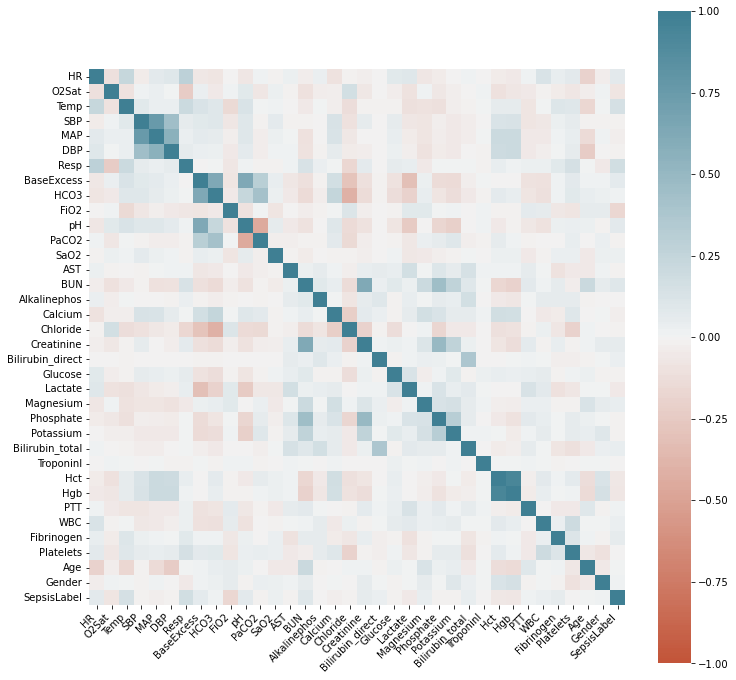

In [28]:
fig = plt.figure(figsize=(12,12))
corr = df_finalA.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [15]:
# Scaling
scaler = StandardScaler()
df_finalA[df_finalA.columns[1:35]] = scaler.fit_transform(df_finalA[df_finalA.columns[1:35]])
df_finalB[df_finalA.columns[1:35]] = scaler.transform(df_finalB[df_finalB.columns[1:35]])

### PCA for A
Applying the PCA method, we will reduce the dimension of the features down to 2 and observe whether there are any evidence of clustering for sepsis and non-spesis patients. From the plot, we can observe that there are no clear separation between the patients. 

In [16]:
features = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2',
 'AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate','Magnesium',
 'Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets','Age',
        'Gender']
# Separating out the features
x_A = df_finalA.loc[:, features].values
# Separating out the target
y_A = df_finalA.loc[:,['SepsisLabel']].values
# Standardizing the features
x_A = StandardScaler().fit_transform(x_A)

In [17]:
pca = PCA(n_components=2)
principalComponents_A = pca.fit_transform(x_A)
principalDf_A = pd.DataFrame(data = principalComponents_A
             , columns = ['principal component 1', 'principal component 2'])
finalDf_A = pd.concat([principalDf_A, df_finalA[['SepsisLabel']]], axis = 1)

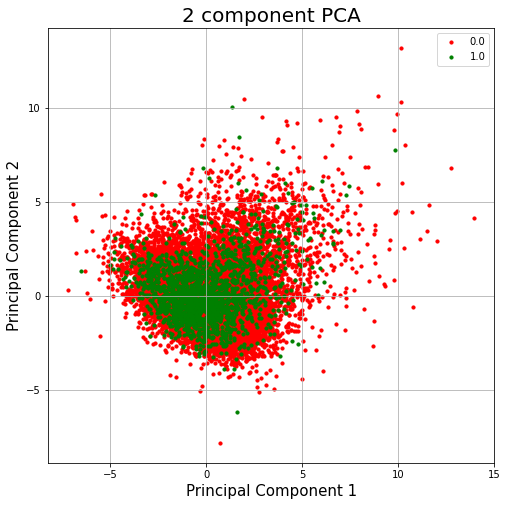

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0,1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_A['SepsisLabel'] == target
    ax.scatter(finalDf_A.loc[indicesToKeep, 'principal component 1']
               , finalDf_A.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

### umap for A
By applying the UMAP method, we are able to reduce the deminson of the data and create a 2D visualization of how the original parameters is related to Sepsis label. We will train the umap 'reducer' using the cleaned and normalized data, 'x_A.' We can then obtain a 2-dimensional representation of all the selected features. We then plot the 2 new feature column by Sepsis lable in a scatter plot. We can observe that there are no clear separation between sepsis patient and non-sepsis patient.

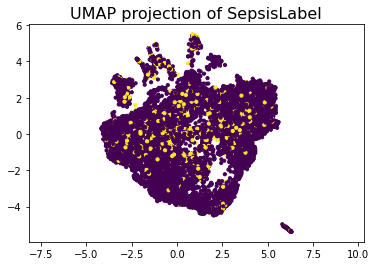

In [19]:
reducer = umap.UMAP()
embedding_A = reducer.fit_transform(x_A)

plt.scatter(
    embedding_A[:, 0],
    embedding_A[:, 1],
    c=df_finalA.SepsisLabel,
    s=10
)
plt.title('UMAP projection of SepsisLabel', fontsize=16)
plt.gca().set_aspect('equal', 'datalim')

# Model Implementation

## Data Pre-processing

In [20]:
## split the train_x, train_y, test_x, test_y
x_train = df_finalA.iloc[:,1:36]
y_train = df_finalA.loc[:, ['SepsisLabel']]
x_test = df_finalB.iloc[:,1:36]
y_test = df_finalB.loc[:, ['SepsisLabel']]

### Balancing Data

In [21]:
print("Original y:")
print(y_train.groupby(y_train["SepsisLabel"]).value_counts(normalize=False)) 
#18546 "0" + 1790 "1"

Original y:
SepsisLabel
0.0    18546
1.0     1790
dtype: int64


The original data is highly imbalanced: only 1,790 participants were test positive of Sepsis, which the remaining 18,546 participants were labeled 0 for non-positive. This largely influences the models in classifing the minority class-diagnosed Sepsis, which is more important.  Therefore, we used Synthetic Minority Oversampling Technique (SMOTE) to balance data before building models. Particularly in our case, since one of the covariate `Gender` is binary, we applied the `SMOTENC` function from `imblearn.over_sampling` module and set the `categorical_features` argument to specify it. After balancing on our training sets, we obtained 18,546 zero-labeled records and 18,546 ones of Sepsis. 

In [22]:
sm = SMOTENC(random_state=42, categorical_features=[34]) # Column 35 is Gender, a categorical variable
# generate balanced training datasets using SMOTE
x_res, y_res = sm.fit_resample(x_train, y_train)
# convert the outcome into a numpy array for later convenience
y_res = np.ravel(y_res)

In [23]:
print("After SMOTE:")
print("0:", len(y_res[y_res==0]))
print("1:", len(y_res[y_res==1]))
#18546 "0" + 18546 "1"

After SMOTE:
0: 18546
1: 18546


### Variable Selection

Fitting a LASSO regression, we conducted variable selection before applying classification models. Coefficients of three covariates are relatively small ($<0.005$): `Chloride(mmol/L)`, `Troponin I (ng/mL)` and `Hematocrit (%)`. Therefore, we dropped these above ones and obtained final datasets for modeling.

In [17]:
lasso_res = GridSearchCV(
    Lasso(), 
    param_grid = {"alpha": np.arange(5e-05, 2e-04, 1e-06)},
    scoring='neg_mean_squared_error',
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0),
    n_jobs= -1
).fit(
    x_res, y_res
)
# summarize
print('MSE: %.3f' % lasso_res.best_score_)
print('Config: %s' % lasso_res.best_params_)

MSE: -0.177
Config: {'alpha': 0.00013199999999999977}


In [18]:
lasso_coef = lasso_res.best_estimator_.coef_
lasso_coef

array([ 0.01318951, -0.03946967,  0.08545039, -0.00664377, -0.02730352,
        0.01094795,  0.10074287,  0.00873825, -0.01293656, -0.12578299,
        0.02512151,  0.01405773,  0.01807017,  0.00699177,  0.02372579,
       -0.01804076, -0.00531194,  0.00334292,  0.01667495,  0.00538894,
       -0.00950088, -0.0269503 ,  0.04007773, -0.01588716, -0.0201449 ,
        0.01215504, -0.00112452,  0.00038257, -0.05636893,  0.01626599,
        0.03224709,  0.01086034, -0.02830717,  0.01585452,  0.17045032])

In [19]:
discard_coef = x_res.columns[abs(lasso_coef)<=0.005] # if the absolute value of coefficients are less than 0.005, we viewed 
discard_coef

Index(['Chloride', 'TroponinI', 'Hct'], dtype='object')

In [ ]:
# Final data using in following models
x_test =x_test.drop(discard_coef, axis=1)
x_res =x_res.drop(discard_coef, axis=1)
x_train = x_train.drop(discard_coef, axis=1)

### Helper Function

In [37]:
# confusion matrix re-formatting
def cm_format(y_test, y_pred):
    confmat = confusion_matrix(y_test, y_pred)
    df = pd.DataFrame({'Prediction 1': [confmat[1,1], confmat[0,1]], 'Prediction 0': [confmat[1,0], confmat[0,0]]})
    df.index = ['Test 1', 'Test 0']
    return(df)

## Model 1: Logistic Regression

In [28]:
np.random.seed(1234)
parameters = {'loss':['log'], 'penalty': ('l1', 'l2', 'elasticnet', 'none'), 'alpha': list(np.arange(0.001,1,0.01))}
logistic = SGDClassifier()
logistic_cv = GridSearchCV(logistic, parameters, 
                           cv = sklearn.model_selection.StratifiedKFold(5, shuffle=True, random_state=1234))
logistic_cv.fit(x_res,y_res)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=SGDClassifier(),
             param_grid={'alpha': [0.001, 0.011, 0.020999999999999998,
                                   0.030999999999999996, 0.040999999999999995,
                                   0.05099999999999999, 0.06099999999999999,
                                   0.071, 0.08099999999999999,
                                   0.09099999999999998, 0.10099999999999998,
                                   0.11099999999999999, 0.12099999999999998,
                                   0.13099...,
                                   0.15099999999999997, 0.16099999999999998,
                                   0.17099999999999999, 0.18099999999999997,
                                   0.19099999999999998, 0.20099999999999996,
                                   0.21099999999999997, 0.22099999999999997,
                                   0.23099999999999996, 0.24099999999999996,
      

In [32]:
print("tuned hpyerparameters :(best parameters) ",logistic_cv.best_params_)
print("accuracy :",logistic_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.011, 'loss': 'log', 'penalty': 'l2'}
accuracy : 0.758734855900906


In [34]:
LR_best = SGDClassifier(loss = logistic_cv.best_params_["loss"], 
                        penalty = logistic_cv.best_params_["penalty"], 
                        alpha = logistic_cv.best_params_["alpha"]) 
LR_best.fit(x_res,y_res)

SGDClassifier(alpha=0.011, loss='log')

In [35]:
y_pred_LR = LR_best.predict(x_test)
accuracy_score(y_test,y_pred_LR)

0.8479

In [38]:
print(cm_format(y_test, y_pred_LR))

        Prediction 1  Prediction 0
Test 1           554           588
Test 0          2454         16404


In [39]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92     18858
         1.0       0.18      0.49      0.27      1142

    accuracy                           0.85     20000
   macro avg       0.57      0.68      0.59     20000
weighted avg       0.92      0.85      0.88     20000



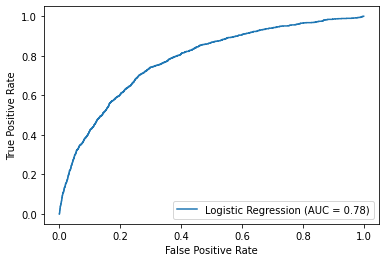

AUC 0.780117242720459


In [40]:
# ROC plot and AUC for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, LR_best.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                       estimator_name='Logistic Regression').plot()
plt.show()
print("AUC", roc_auc)

##### Fit the Logistic Regression Model by SGD
Applying the Stochastic Gradient Descent (SGD) to the regularized linear methods can help building an estimator for classification and regression problems. The SGD classifier works well with large-scale datasets and it is an efficient and easy to implement method.
Compared by the accuracy, the logistic regression with l1 norm has better performance. 

In [ ]:
# coeffient
coef = LR_best.coef_.ravel()
pyplot.stem(coef, use_line_collection=True)

## Model 2: KNN

In [26]:
KNN_gs = GridSearchCV(
   KNeighborsClassifier(),
   param_grid = {
     "n_neighbors": np.arange(15, 25)
   },
   cv = sklearn.model_selection.StratifiedKFold(10, shuffle=True, random_state=1234),
   scoring = "accuracy",
   n_jobs = 4
 ).fit(
   x_res, y_res
 )

print(KNN_gs.best_params_)
print(KNN_gs.best_score_)

{'n_neighbors': 16}
0.8404234763694923


In [65]:
y_pred_KNN = KNN_gs.predict(x_test)
accuracy_score(y_test,y_pred_KNN)

0.7591

In [66]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86     18858
         1.0       0.13      0.55      0.21      1142

    accuracy                           0.76     20000
   macro avg       0.55      0.66      0.53     20000
weighted avg       0.92      0.76      0.82     20000



In [67]:
print(cm_format(y_test, y_pred_KNN))

        Prediction 1  Prediction 0
Test 1           633           509
Test 0          4309         14549


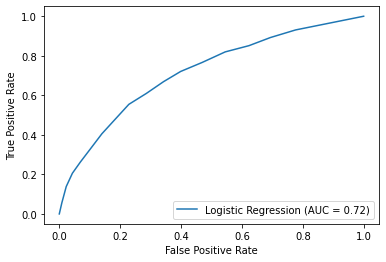

AUC 0.7165243550331643


In [28]:
# ROC plot and AUC for KNN
fpr, tpr, thresholds = roc_curve(y_test, KNN_gs.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                       estimator_name='Logistic Regression').plot()
plt.show()
print("AUC", roc_auc)

## Model 3: Naive Bayes

In [41]:
NB_gs = GridSearchCV(
  GaussianNB(),
  param_grid = {
      "var_smoothing": np.linspace(1.5, 2.0, 30)
  },
  cv = sklearn.model_selection.StratifiedKFold(10, shuffle=True, random_state=1234),
  scoring = "accuracy",
  n_jobs = -1
).fit(
  x_res, y_res
)

print(NB_gs.best_params_)
print(NB_gs.best_score_)

{'var_smoothing': 1.5172413793103448}
0.7242802057209133


In [42]:
y_pred_NB = NB_gs.predict(x_test)
accuracy_score(y_test,y_pred_NB)

0.84975

In [44]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.92     18858
         1.0       0.18      0.45      0.26      1142

    accuracy                           0.85     20000
   macro avg       0.57      0.66      0.59     20000
weighted avg       0.92      0.85      0.88     20000



In [45]:
print(cm_format(y_test, y_pred_NB))

        Prediction 1  Prediction 0
Test 1           516           626
Test 0          2379         16479


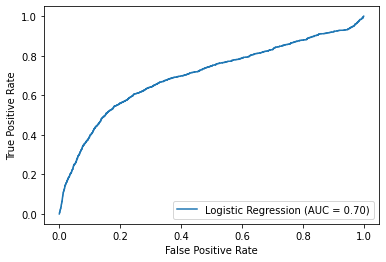

AUC 0.7015471793154442


In [46]:
# ROC plot and AUC for Naive Bayes
fpr, tpr, thresholds = roc_curve(y_test, NB_gs.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                       estimator_name='Logistic Regression').plot()
plt.show()
print("AUC", roc_auc)

## Model 4: Random Forest

The forth model we built is random forest. Based on the balanced dataset, we tuned parameters using 5-fold cross-validation method. The optimal model with the maximum depth of the tree being 50, results in an 96.29% training accuracy. However, when we applied it to test data, the random forest performs poorly in predicting Sepsis patients, which leads to the result that the test accuracy is only about 77.07% and AUC

In [24]:
rf_res = GridSearchCV(
    RandomForestClassifier(), 
    param_grid = {
        "max_depth": [40, 45, 50, 55, 60], 
        "n_estimators": [10, 50, 100], 
        "min_samples_leaf": [1, 2, 5]},
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
    n_jobs= -1
).fit(
    x_res, y_res
)

In [34]:
print("Best Estimator from Random Forest is:", rf_res.best_estimator_)
print("training accuracy :", rf_res.best_score_)
print(classification_report(y_test, rf_res.best_estimator_.predict(x_test)))

Best Estimator from Random Forest is: RandomForestClassifier(max_depth=50)
training accuracy : 0.9628790942175496
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87     18858
         1.0       0.11      0.42      0.17      1142

    accuracy                           0.77     20000
   macro avg       0.53      0.61      0.52     20000
weighted avg       0.91      0.77      0.83     20000



In [68]:
y_pred_rf = rf_res.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.77065

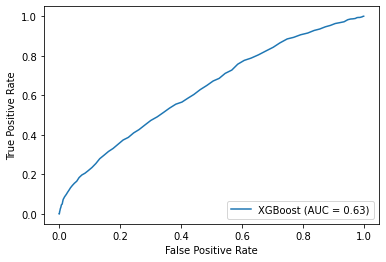

AUC 0.6305942801570369


In [25]:
# ROC plot and AUC for RF
fpr, tpr, thresholds = roc_curve(y_test, rf_res.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                       estimator_name='XGBoost').plot()
plt.show()
print("AUC", roc_auc)

In [69]:
print(cm_format(y_test, y_pred_rf))

        Prediction 1  Prediction 0
Test 1           482           660
Test 0          3927         14931


## Model 5: XGBoost

Because `XGBClassifier` has a built-in parameter `scale_pos_weight`, which controls the balance of positive and negative weights for an imbalance dataset. Therefore, using the balanced dataset from SMOTE is not necessary.


In [47]:
y_tr = np.ravel(y_train)

xbg_gs = GridSearchCV(
   xgb.XGBClassifier(),
   param_grid = {'n_estimators': range(50,200,50), 'max_depth': range(2,4,1), 
                 'eta': list(np.arange(0.2,1,0.2)), 'scale_pos_weight': [sum(y_tr==0)/sum(y_tr==1)]},
   cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234),
   scoring = "accuracy",
   n_jobs = 4
 ).fit(
   x_train, y_train
 )

print("Best Estimator from XGBoost is:", xbg_gs.best_params_)
print("accuracy :", xbg_gs.best_score_)

Best Estimator from XGBoost is: {'eta': 0.8, 'max_depth': 3, 'n_estimators': 150, 'scale_pos_weight': 10.360893854748603}
accuracy : 0.8650667325251884


In [48]:
y_pred_xgb = xbg_gs.best_estimator_.predict(x_test)
accuracy_score(y_test,y_pred_xgb)

0.8294

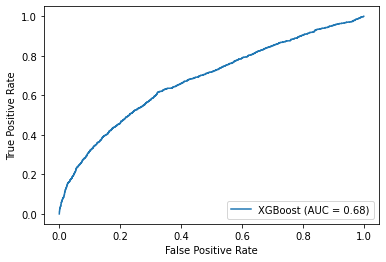

AUC 0.6782110060644964


In [49]:
# ROC plot and AUC for XGB
fpr, tpr, thresholds = roc_curve(y_test, xbg_gs.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                       estimator_name='XGBoost').plot()
plt.show()
print("AUC", roc_auc)

In [50]:
print("XGBoost Confusion Matrix:")
print(cm_format(y_test, y_pred_xgb))

XGBoost Confusion Matrix:
        Prediction 1  Prediction 0
Test 1           447           695
Test 0          2717         16141


In [51]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.90     18858
         1.0       0.14      0.39      0.21      1142

    accuracy                           0.83     20000
   macro avg       0.55      0.62      0.56     20000
weighted avg       0.91      0.83      0.86     20000



### Neural Network for Classification with Tensorflow

In [ ]:
# tf.random.set_seed(42)
# model_nn = tf.keras.Sequential([
#     tf.keras.layers.Dense(10, activation = 'sigmoid'), 
#     tf.keras.layers.Dense(10, activation = 'sigmoid'),
#     tf.keras.layers.Dense(1, activation = 'sigmoid')
# ])

# model_nn.compile(loss= tf.keras.losses.binary_crossentropy,
#                 optimizer = tf.keras.optimizers.Adam(),
#                 metrics = ['accuracy'])

# history = model_nn.fit(x_train, np.ravel(y_train), validation_data=(x_test, y_test), epochs = 200, verbose = 0)

In [ ]:
# loss, accuracy = model_nn.evaluate(x_test, y_test)
# print(f' Model loss on the test set: {loss}')
# print(f' Model accuracy on the test set: {100*accuracy}')

## Result/Diagnosis

In [ ]:
# test accuracy and AUC summary
df = pd.DataFrame({'LR': [0.8412,0.7801], 'KNN': [0.7591,0.7165], 'NB': [0.8253,0.7595],
                   'RF': [0.7282,0.6306], 'XGB': [0.7809,0.7452]})
df.index = ['Accuracy','AUC']
df

,LR,KNN,NB,RF,XGB
Accuracy,0.8412,0.7591,0.8253,0.7282,0.7809
AUC,0.7801,0.7165,0.7595,0.6306,0.7452


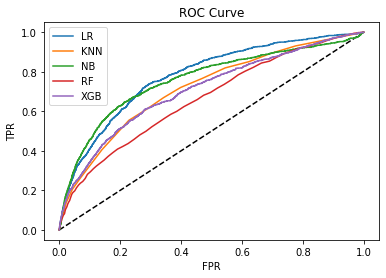

In [88]:
# AUC plot
# https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python
y_pred_prob1 = LR_best.predict_proba(x_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = KNN_gs.predict_proba(x_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = NB_gs.predict_proba(x_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = rf_res.predict_proba(x_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = xbg_gs.predict_proba(x_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LR")
plt.plot(fpr2, tpr2, label= "KNN")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "RF")
plt.plot(fpr5, tpr5, label= "XGB")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC Curve')
plt.show()


In [68]:
# Confusion Matrix
print("Logistics Regression")
print(cm_format(y_test, y_pred_LR))
print("KNN")
print(cm_format(y_test, y_pred_KNN))
print("Naive Bayes")
print(cm_format(y_test, y_pred_NB))
print("Random Forest")
print(cm_format(y_test, y_pred_rf))
print("XGBoost")
print(cm_format(y_test, y_pred_xgb))

Logistics Regression
        Prediction 1  Prediction 0
Test 1           556           586
Test 0          2591         16267
KNN
        Prediction 1  Prediction 0
Test 1           633           509
Test 0          4309         14549
Naive Bayes
        Prediction 1  Prediction 0
Test 1           656           486
Test 0          3009         15849
Random Forest
        Prediction 1  Prediction 0
Test 1           547           595
Test 0          4842         14016
XGBoost
        Prediction 1  Prediction 0
Test 1           589           553
Test 0          3829         15029


### Variable Importance

<StemContainer object of 3 artists>

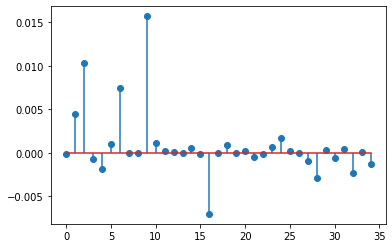

In [58]:
# Logistic regression
coef = LR_best.coef_.ravel()
imps_lr = permutation_importance(LR_best, x_test, y_test)
pyplot.stem(imps_lr.importances_mean, use_line_collection=True)

<StemContainer object of 3 artists>

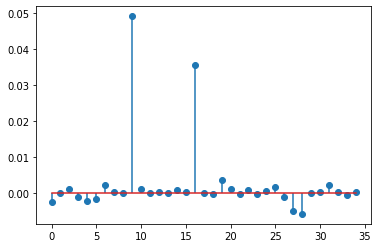

In [59]:
# NB
from sklearn.inspection import permutation_importance
imps = permutation_importance(NB_gs, x_test, y_test)
pyplot.stem(imps.importances_mean, use_line_collection=True)

In [73]:
x_test.columns[[8,15,18,26,27]]

Index(['HCO3', 'Alkalinephos', 'Creatinine', 'TroponinI', 'Hct'], dtype='object')